<a href="https://colab.research.google.com/github/FrancoN28/Lab_Data_Analysis/blob/main/Graficos_con_multiples_ejes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt


#cosas de python

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import scipy.special as special

import io

In [ ]:
plt.rc('figure', figsize=(11,6), titlesize=19, facecolor='#F6F6F6')
plt.rc('grid', linestyle='--' )
plt.rc('font', size = 13)

In [ ]:
data = pd.read_csv("primer thevenin.txt",sep='\t')
data.columns = ["r", "P", "V", "I"]
data

,r,P,V,I
0,50.0,0.000054,-0.052077,-0.001042
1,75.0,0.000078,-0.076486,-0.001020
2,100.0,0.000100,-0.099896,-0.000999
3,125.0,0.000120,-0.122368,-0.000979
4,150.0,0.000138,-0.143958,-0.000960
5,175.0,0.000155,-0.164716,-0.000941
6,200.0,0.000171,-0.184689,-0.000923
7,225.0,0.000185,-0.203921,-0.000906
8,250.0,0.000198,-0.222453,-0.000890
9,275.0,0.000210,-0.240321,-0.000874


In [ ]:
data['P'] = data['P']*1000
data['I'] = data['I']*1000


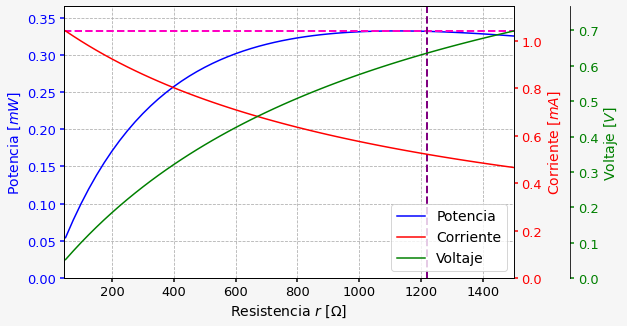

In [ ]:
# USO EL SGTE LINK
# https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (10,5))

fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines['right'].set_position(("axes", 1.125))

p1, = ax.plot(data['r'], data['P'], "b-", label="Potencia")
p2, = twin1.plot(data['r'],-data['I'], "r-", label="Corriente")
p3, = twin2.plot(data['r'],-data['V'], "g-", label="Voltaje")

ax.axhline(max(data['P']), ls = '--', lw =2, c = '#FF00C3', label = r'$P_{MAX}$')
ax.axvline(1220, ls = '--', lw =2, c = 'purple', label = r'$R_{TH}$ ') #data['r'][index(max(data['P']))]

ax.set_xlim(min(data['r']*0.9), max(data['r']))
ax.set_ylim(0, max(data['P']*1.1))
twin1.set_ylim(0, max(-data['I']*1.1))
twin2.set_ylim(0, max(-data['V']*1.1))

ax.set_xlabel(r'Resistencia $r$ [$\Omega$]',fontsize = 14)
ax.set_ylabel("Potencia [$mW$]",fontsize = 14)
twin1.set_ylabel("Corriente [$mA$]",fontsize = 14)
twin2.set_ylabel("Voltaje [$V$] ",fontsize = 14)

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend()
ax.legend(handles=[p1, p2, p3],fontsize = 14, loc = 4)
ax.grid()

plt.show()